# Parker AIF

In [1]:
import os
import numpy
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import csv
import seaborn as sns
import pandas as pd

## Background
The Parker AIF is a population AIF derived from 67 AIFs in the paper of Parker et al. (Magn Reson Med, 2006). Table 1 of the paper describes the parameters of the functional form of this population AIF.


## Test data
The parameters of Table 1 were used to create the test data. For the original AIF the same temporal resolution (4.97 s) and acquisition time (5 min) were used.
Permutations of this AIF were used to test the implementations:
- various temporal resolutions: 0.5, 1, 2, 2.5, 5, 7.5 s
- various acquistion times: 3, 5, 7, 10 min
- shifts of the AIF with a temporal resolution of 1.5 s (dt): 0, dt, 2*dt, 5*dt, 2, 5, 10, 18, 31

As we don't expect many errors in implementing the population AIFs, the tolerances were set tight.  
Tolerances: absolute + relative = 0.0001 mM + 0.01 and 0.1 mM + 0.1 for the data with a shift.


## Import data

In [2]:
data_dir = r'../test/results/PopulationAIF_DCE//'
# combine data from CSV files
df = pd.concat([
    pd.read_csv(data_dir + 'TestResults_PopAIF_Parker_AIF_MJT_EdinburghUK.csv').assign(author='MJT_UoEdinburgh_UK'),
    pd.read_csv(data_dir + 'TestResults_PopAIF_Parker_AIF_MB_QBI_UoManchesterUK.csv').assign(author='MB_QBI_UoManchesterUK'),
    pd.read_csv(data_dir + 'TestResults_PopAIF_Parker_AIF_PvH_NKI_NL.csv').assign(author='PvH_NKI_NL'),
    pd.read_csv(data_dir + 'TestResults_PopAIF_Parker_AIF_ST_SydneyAus.csv').assign(author='ST_Sydney_Aus')])

# label data source
df['source']=''
df.loc[df['label'].str.contains('original'),'source']='original'
df.loc[df['label'].str.contains('acq_time_'),'source']='acq_time'
df.loc[df['label'].str.contains('temp_res'),'source']='temp_res' 
df.loc[df['label'].str.contains('delay'),'source']='delay' 

author_list = df.author.unique()
no_authors = len(author_list)

## Results

### Original AIF

<Figure size 432x288 with 0 Axes>

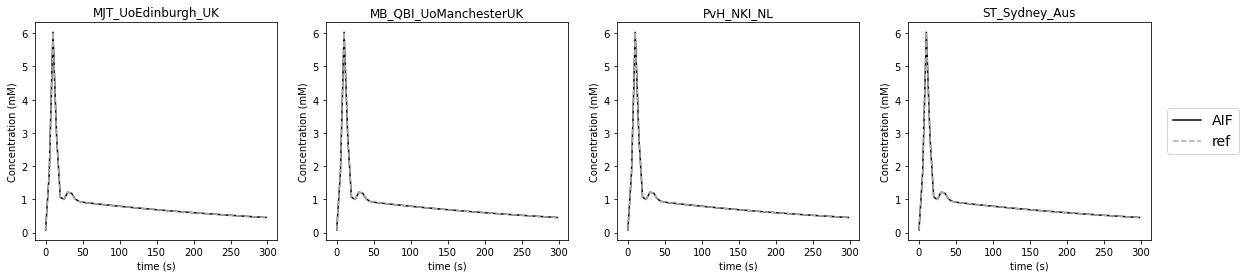

In [3]:
data_original = df[(df['source']=='original')]  

plt.figure()
fig, axs = plt.subplots(1, no_authors, sharey='none',figsize=(20,4))

for current_author in range(no_authors):
    plt.subplot(1,no_authors,current_author+1)
    subset_data = data_original[data_original['author'] == author_list[current_author]]
    plt.plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
    plt.plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')
    
    plt.title(author_list[current_author])
    plt.xlabel('time (s)')
    plt.ylabel('Concentration (mM)')
    
    if current_author == no_authors-1:
        axs[current_author].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)


### Different acquisition times

There are no errors for different acquisition times.  
This test data was added to check whether the contributions can work with acquisition times different from the original reference.

<Figure size 432x288 with 0 Axes>

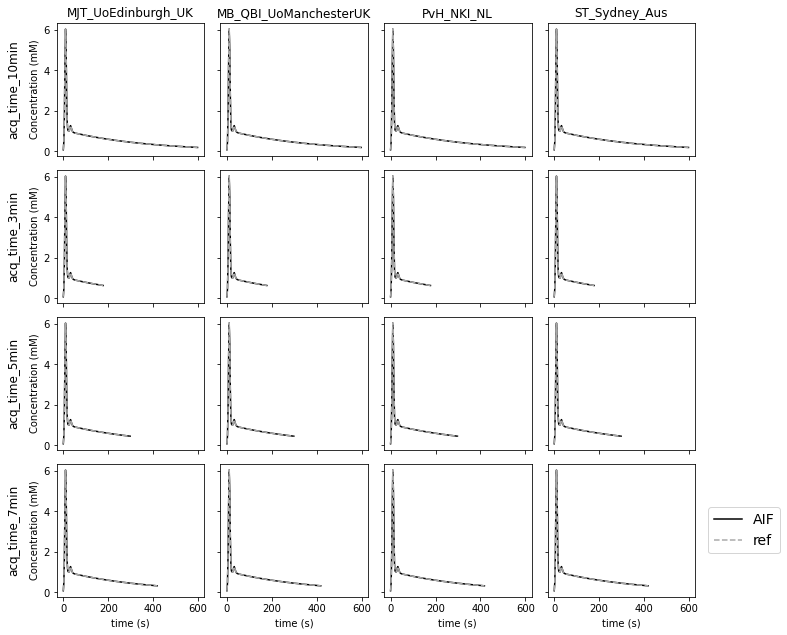

In [4]:
data_acqtime = df[(df['source']=='acq_time')]
acq_list = data_acqtime.label.unique()
no_acq = len(acq_list)

plt.figure()
fig, ax = plt.subplots(no_acq, no_authors, sharex='col', sharey='row', figsize=(12,9))

for current_acq in range(no_acq):
    for current_author in range(no_authors):
        subset_data = data_acqtime[(data_acqtime['author'] == author_list[current_author]) & (data_acqtime['label'] == acq_list[current_acq])]
        ax[current_acq,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_acq,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_acq == 0:
            ax[current_acq,current_author].set_title(author_list[current_author])
        if current_author == 0:
            ax[current_acq,current_author].set_ylabel('Concentration (mM)')
        if current_acq == no_acq-1:
            ax[current_acq,current_author].set_xlabel('time (s)')

ax[no_acq-1,no_authors-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)

# add extra labels for rows (example taken from: https://microeducate.tech/row-and-column-headers-in-matplotlibs-subplots/)
pad = 5
for a, row in zip(ax[:,0], acq_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)


### Different temporal resolutions

There are no errors for various temporal resolutions  
This test data was added to check whether the contributions can work with temporal resolutions different from the original reference.

<Figure size 432x288 with 0 Axes>

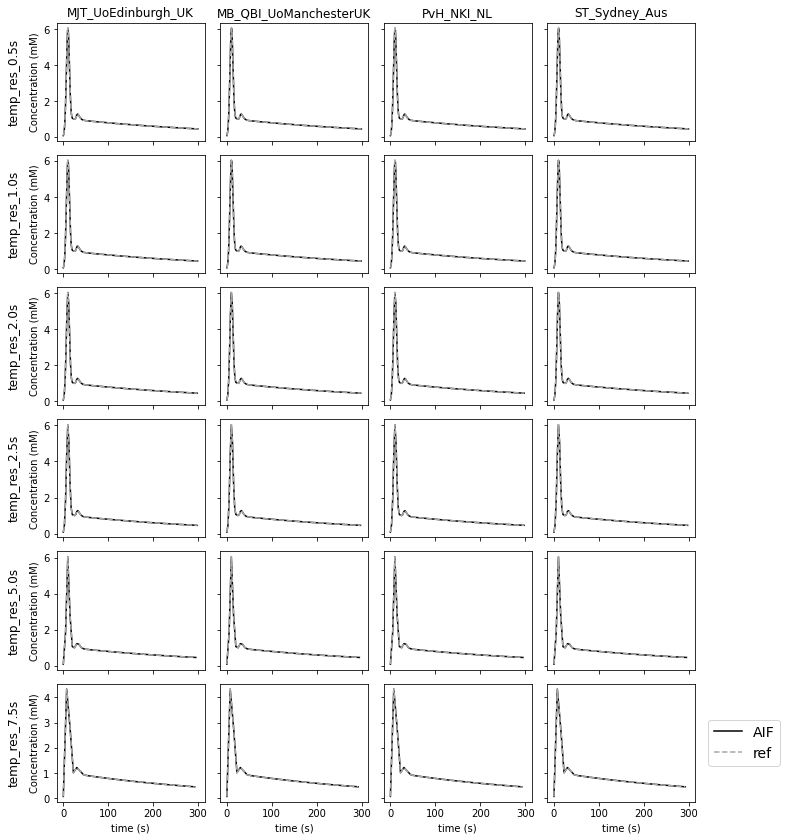

In [5]:
data_res = df[(df['source']=='temp_res')]
res_list = data_res.label.unique()
no_res = len(res_list)

plt.figure()
fig, ax = plt.subplots(no_res, no_authors, sharex='col', sharey='row', figsize=(12,12))

for current_res in range(no_res):
    for current_author in range(no_authors):
        subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
        ax[current_res,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_res,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_res == 0:
            ax[current_res,current_author].set_title(author_list[current_author])
        if current_author == 0:
            ax[current_res,current_author].set_ylabel('Concentration (mM)')
        if current_res == no_res-1:
            ax[current_res,current_author].set_xlabel('time (s)')

ax[no_res-1,no_authors-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)

# add extra labels for rows
pad = 5
for a, row in zip(ax[:,0], res_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

### Variations in bolus arrival time

This test data was added to check how contributions deal with a difference in bolus arrival time.
Notes: 
- Not all contributions allowed for a variation in bolus arrival time.
- There are slight differences for delays that are not exact multiplications of the temporal resolution. There the original AIF is shifted to the nearest integer, instead of re-calculated.

<Figure size 432x288 with 0 Axes>

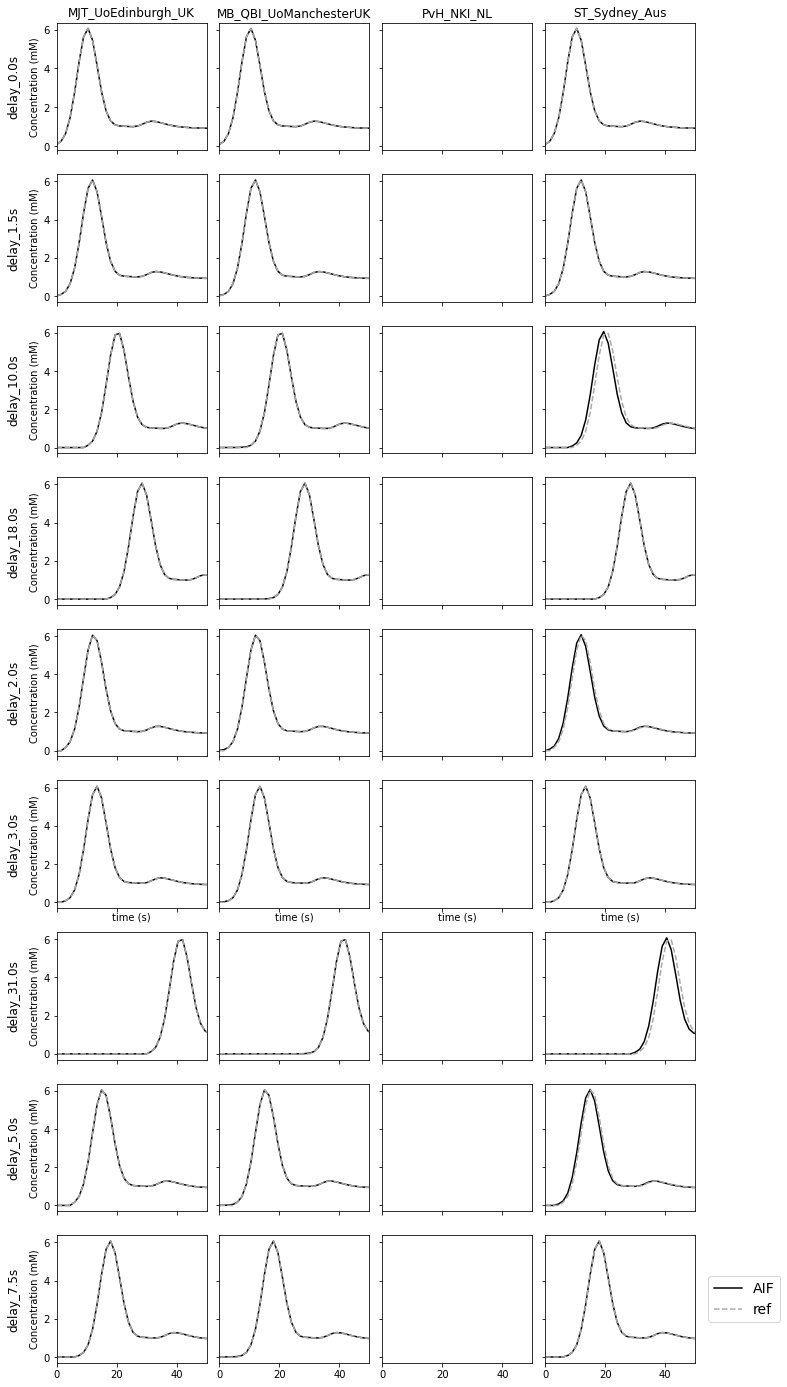

In [6]:
data_delay = df[(df['source']=='delay')]
delay_list = data_delay.label.unique()
no_delay = len(delay_list)

plt.figure()
fig, ax = plt.subplots(no_delay, no_authors, sharex='col', sharey='row', figsize=(12,20))

for current_delay in range(no_delay):
    for current_author in range(no_authors):
        subset_data = data_delay[(data_delay['author'] == author_list[current_author]) & (data_delay['label'] == delay_list[current_delay])]
        ax[current_delay,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_delay,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_delay == 0:
            ax[current_delay,current_author].set_title(author_list[current_author])
        if current_author == 0:
            ax[current_delay,current_author].set_ylabel('Concentration (mM)')
        if current_delay == no_res-1:
            ax[current_delay,current_author].set_xlabel('time (s)')
        
        ax[current_delay,current_author].set_xlim([0, 50])

ax[no_delay-1,no_authors-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)

# add extra labels for rows
pad = 5
for a, row in zip(ax[:,0], delay_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

## Notes
Additional notes/remarks

### References

Parker et al. Experimentally-Derived Functional Form for a Population-Averaged High-Temporal-Resolution Arterial Input Function for Dynamic Contrast-Enhanced MRI. Magnetic Resonance in Medicine 56:993–1000 (2006); DOI 10.1002/mrm.21066